In [44]:
# Homework 3 - Assigment 2
# Pranay Anchan - pya209
# uses NYC data portal NYC OPEN DATA https://data.cityofnewyork.us/

In [45]:
from __future__ import print_function
import os
import pandas as pd


In [46]:
!curl https://data.cityofnewyork.us/api/views/p424-amsu/rows.csv?accessType=DOWNLOAD > trafficvol.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  907k    0  907k    0     0  1097k      0 --:--:-- --:--:-- --:--:-- 1097k


In [47]:
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/pya209/PUIdata


In [48]:
!mv trafficvol.csv $PUIDATA

In [49]:
!ls $PUIDATA

mmr.csv  trafficvol.csv


In [50]:
traf = pd.read_csv("%s/trafficvol.csv"%os.getenv("PUIDATA"))

In [51]:
traf.head(7)

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/02/2013,106,74,45.0,...,371,398,324,394,379,329,249,197,187,169
1,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/03/2013,109,74,55.0,...,308,291,313,253,242,217,210,144,125,79
2,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/04/2013,36,28,11.0,...,426,425,419,469,425,358,224,185,132,74
3,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/05/2013,42,28,16.0,...,393,479,441,476,446,424,305,219,171,76
4,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/06/2013,35,38,12.0,...,383,384,391,369,401,338,236,186,123,76
5,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/07/2013,33,26,14.0,...,151,409,422,364,356,339,275,225,169,104
6,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/08/2013,35,28,18.0,...,430,518,461,485,531,393,351,276,242,154


In [52]:
traf.tail(3)

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
5942,377,179545,E 177 ST,HARDING AVENUE,LONGSTREET AVENUE,WB,02/05/2013,13,9,5.0,...,93,103,83,96,88,68,73,30,21,31
5943,377,179545,E 177 ST,HARDING AVENUE,LONGSTREET AVENUE,WB,02/06/2013,12,8,1.0,...,97,107,78,87,109,64,50,41,58,17
5944,377,179545,E 177 ST,HARDING AVENUE,LONGSTREET AVENUE,WB,02/07/2013,20,11,6.0,...,82,104,84,105,100,68,61,48,34,29


In [53]:
traf.columns

Index(['ID', 'Segment ID', 'Roadway Name', 'From', 'To', 'Direction', 'Date',
       '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM',
       '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM',
       '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
       '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM',
       '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
       '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM'],
      dtype='object')

In [54]:
traf.size

184295

In [84]:
traf_2c = traf[['12:00-1:00 AM','2:00-3:00PM']]

In [85]:
traf_2c.head()

,12:00-1:00 AM,2:00-3:00PM
0,106,371
1,109,308
2,36,426
3,42,393
4,35,383


In [110]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


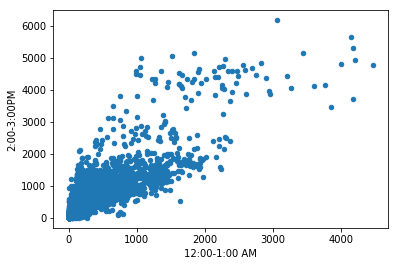

In [111]:
traf_2c.plot(x='12:00-1:00 AM',y='2:00-3:00PM',kind='scatter');

Figure 1: Traffic volume counts between 2:00-3:00PM against 12:00-1:00 AM in NY reported by Department of Transport between years 2012-2013. The graph shows the amount of traffic is larger during 2:00-3:00PM as compared to 12:00-1:00AM.

## Using JSON 

In [26]:
url = "https://data.cityofnewyork.us/resource/ry4b-kref.json"

In [27]:
df = pd.read_json(url)

In [61]:
df.head(3)

,_10_00_11_00am,_10_00_11_00pm,_11_00_12_00am,_11_00_12_00pm,_12_00_1_00_am,_12_00_1_00pm,_1_00_2_00am,_1_00_2_00pm,_2_00_3_00am,_2_00_3_00pm,...,_8_00_9_00pm,_9_00_10_00am,_9_00_10_00pm,date,direction,from,id,roadway_name,segment_id,to
0,387,187,169,335,106,406,74,411,45,371,...,249,278,197,2013-02-02,NB,WOODROW RD,1,HUGUENOT AVE,2153,STAFFORD AVE
1,249,125,79,351,109,374,74,350,55,308,...,210,204,144,2013-02-03,NB,WOODROW RD,1,HUGUENOT AVE,2153,STAFFORD AVE
2,282,132,74,307,36,304,28,328,11,426,...,224,263,185,2013-02-04,NB,WOODROW RD,1,HUGUENOT AVE,2153,STAFFORD AVE


In [88]:
traf_3c = df[['date', '_12_00_1_00_am', '_2_00_3_00pm']]

In [106]:
traf_3c.rename(columns = {'date':'Date', 
               '_12_00_1_00_am':'12:00-1:00 AM', 
               '_2_00_3_00pm': '2:00-3:00PM'}, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [107]:
traf_3c.columns

Index(['Date', '12:00-1:00 AM', '2:00-3:00PM'], dtype='object')

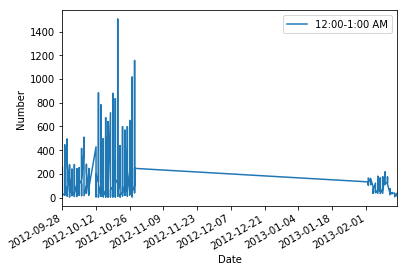

In [108]:
ax = traf_3c.plot(x='Date', y='12:00-1:00 AM');
ax.set_ylabel("Number");

Figure 2: some explanation

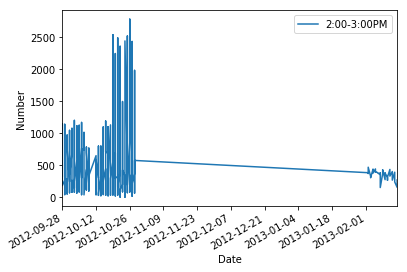

In [109]:
ax = traf_3c.plot(x='Date', y='2:00-3:00PM');
ax.set_ylabel("Number");